In [14]:

!pip install --upgrade osmnx
!pip install --upgrade scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


ImportError: scikit-learn must be installed to search an unprojected graph

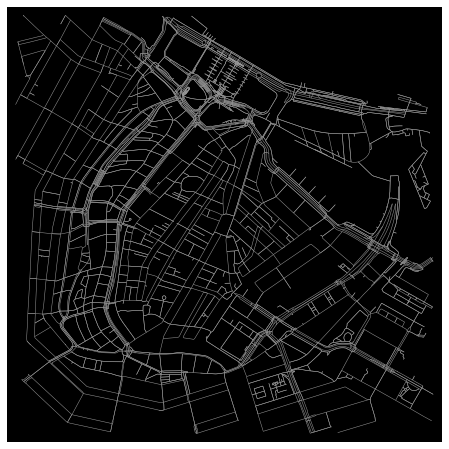

In [15]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import sklearn
# Define the coordinates of the waypoints in Amsterdam
waypoints = [
    (52.3676, 4.9041),  # Amsterdam Centraal Station
    (52.3784, 4.9005),  # Dam Square
    (52.3655, 4.9049)   # Nieuwmarkt
]

# Get the street network for Amsterdam
place_name = "Netherlands"
G = ox.graph_from_address(place_name, network_type='all', dist=1000)

fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0, edge_linewidth=0.5, edge_color="#999999", show=False, close=False)

# Use this list to collect all the route nodes
all_route_nodes = []

# Iterate through the waypoints and find the shortest path between them, then plot each route
for i in range(len(waypoints)-1):
    start_node = ox.distance.nearest_nodes(G, waypoints[i][1], waypoints[i][0])
    end_node = ox.distance.nearest_nodes(G, waypoints[i+1][1], waypoints[i+0])
    route = nx.shortest_path(G, start_node, end_node, weight='length')
    all_route_nodes.extend(route)  # Add the nodes of this segment to the list
    
    # Plot the route for this segment
    ox.plot_graph_route(G, route, route_linewidth=5, route_color='b', route_alpha=0.8, ax=ax, show=False)

# To plot waypoints, convert their coordinates to X, Y for the plot
for point in waypoints:
    x, y = ox.project_geometry(ox.geometry.Point((point[1], point[0])), to_crs=G.graph['crs'])[0].xy
    ax.scatter(x, y, c='green', s=100)

plt.show()
